# Implementing Coding Convolutional Neural Networks in keras :

## Creating the CNN model in Keras using the Sequential API

The Tensorflow interface, while simpler than coding a complex neural network by hand, is nevertheless somewhat laborious to use; all the variables have to be specifically created, we have to create a session etc. Luckily, a package was created which acts as a layer above Tensorflow (and other packages) to simplify the coding process. This package is called Keras.

We are now going to create the same network as in part 1 with Keras.The interfance is quite simplified in comparison to that of Tensorflow.

Here is a summary of the network again

- The input of the CNN is a set of (m,n,3) image tensors (m and n depend on the dataset).
- We apply 
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - additive biases
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2) (i.e. we reduce by two the size in each dimension)
    
    - We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)



Keras has a simple way of adding layers to create a neural network. First, we will indicate to Keras that the model is 'sequential', that is to say, a straight-forward CNN. For this, we can use the following function :
- ```model = Sequential()```

After this, we can add layers with the function.

- ```model.add()```

we can then use the ```Conv2D```, ```Activation```, ```MaxPooling2D```, ```Flatten``` and ```Dense``` (fully connected) functions to specify different layer types. we will have to specify the parameters of these functions to create the network architecture.


## We first import some keras packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
print(keras.__version__)

2.4.3


## Define the model parameters again

In [2]:
learning_rate = 0.01
n_epochs = 10
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)
# re-define the input shapes
input_shape = (32, 32, 3)
nb_classes = 10

## Import the CIFAR10 dataset

In [3]:
## Import the CIFAR10 data and carry out some pre-processing
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# input image dimensions
img_rows, img_cols, nb_channels = X_train.shape[1], X_train.shape[2], X_train.shape[3]

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

nb_classes = Y_train.shape[1]

print('X_train shape:', X_train.shape)
#print('y_train shape:', y_train.shape)
print('Y_train shape:', Y_train.shape)
print('There is {} train data'.format(X_train.shape[0]))
print('There is {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)


# the CIFAR10 categories
cifar_10_list = [ 'airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#modify the number of input channels 
n_h_0 = nb_channels
# add more epochs
n_epochs = 100


X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
There is 50000 train data
There is 10000 test data
32 32 3


In [4]:
# clip data

max_data = 10000
X_train = X_train[0:max_data,:,:,:]
X_test =  X_test[0:max_data,:,:,:]
Y_train = Y_train[0:max_data,:]
Y_test =  Y_test[0:max_data,:]
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (10000, 32, 32, 3)
Y_train shape: (10000, 10)


## Create the CNN now with the network parameters specified above, using the Sequential() API of Keras

In [5]:
model = Sequential([
    Conv2D(nb_filters,
           kernel_size,
           strides=(1,1),
           padding="SAME",
           activation=tf.nn.relu,
           input_shape=input_shape
          ),
    Conv2D(nb_filters,
           kernel_size,
           strides=(1,1),
           padding="SAME",
           activation=tf.nn.relu,
          ),
    MaxPooling2D(
        pool_size=(2, 2),
        strides=(2,2),
        padding='SAME'
        ),
    Conv2D(nb_filters,
           kernel_size,
           strides=(1,1),
           padding="SAME",
           activation=tf.nn.relu,
          ),
    MaxPooling2D(
        pool_size=(2, 2),
        strides=(2,2),
        padding='SAME'
        ),
    Flatten(),
    Dense(
        units=512,
        activation=tf.nn.relu,
    ),
    Dense(
        units=256,
        activation=tf.nn.relu,
    ),Dense(
        units=32,
        activation=tf.nn.relu,
    ),

    Dense(
        units=nb_classes,
        activation=tf.nn.softmax,
    )               
])



## Compile the model

This has created the computational graph correspoding to the network. However, we also need to define the ```loss``` that we will minimize and the ```optimizer``` (the specific algorithm used to perform gradient descent). This can be done with the following simple syntax :

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

## Summary of the network

Keras has an extremely useful function ```summary()``` which summarises the network we have created in a viewer-friendly manner :

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

## Perform the training

The training can be carried out with an extremely simple syntax :

In [ ]:
model.fit(X_train, Y_train,
          batch_size=batch_size, 
          nb_epoch=n_epochs,
          verbose=1, 
          validation_data=(X_test, Y_test))

## We evaluate the performances of the model on the test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 6.528765165710449
Test accuracy: 0.367900013923645


Let's take a look at what the network has learned. What do you think ?

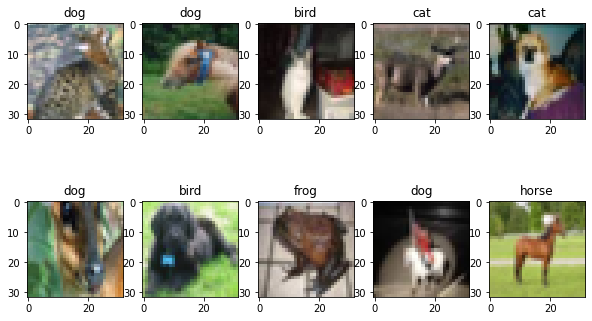

In [0]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    predicted_class = np.argmax(np.squeeze(model.predict(np.expand_dims(X_test[rand_ind,:,:,:],axis=0))))
    plt.imshow(X_test[rand_ind,:,:,:])
    plt.title(cifar_10_list[int(predicted_class)])